In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("/content/Social_Network_Ads.csv")
data.drop(columns=["User ID","Gender"],inplace=True)
data.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [10]:
counts=data["Purchased"].value_counts().reset_index()
counts

,Purchased,count
0,0,257
1,1,143


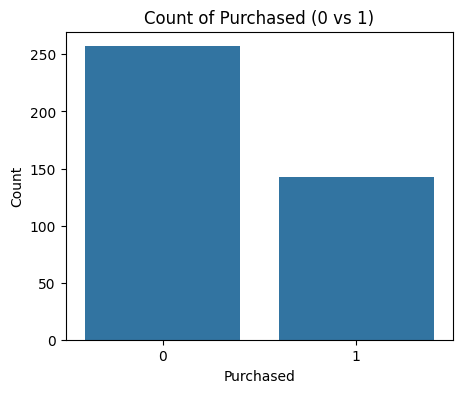

In [31]:
plt.figure(figsize=(5,4))
counts.columns=['Purchased','Count']
sns.barplot(x="Purchased",y="Count",data=counts)
plt.title('Count of Purchased (0 vs 1)')
plt.xlabel("Purchased")
plt.ylabel("Count")
plt.show()

In [3]:
x=data.iloc[:,:-1]
y=data["Purchased"]

In [34]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
x_os,y_os=os.fit_resample(x,y)
y_os.value_counts().reset_index()

,Purchased,count
0,0,257
1,1,257


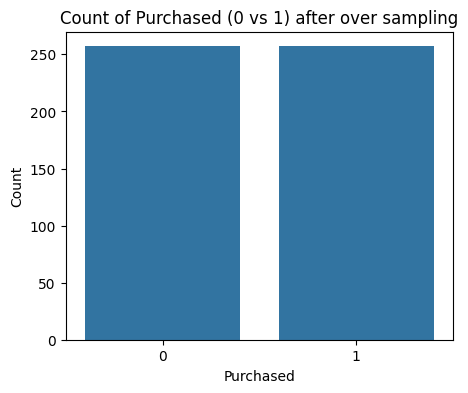

In [33]:
plt.figure(figsize=(5,4))
counts1=y_os.value_counts().reset_index()
counts1.columns=['Purchased','Count']
sns.barplot(x="Purchased",y="Count",data=counts1)
plt.title('Count of Purchased (0 vs 1) after over sampling')
plt.xlabel("Purchased")
plt.ylabel("Count")
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_os,y_os,test_size=0.2,random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
print(lr.score(x_test,y_test)*100)
print(lr.predict([[32,150000]]))

86.40776699029125
[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
